In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
titanic_train = pd.read_csv('../input/titanic/train.csv')
titanic_test = pd.read_csv('../input/titanic/test.csv')

In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
numerical_cols = [cname for cname in titanic_train.columns if titanic_train[cname].dtype in ['int64', 'float64']]
numerical_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

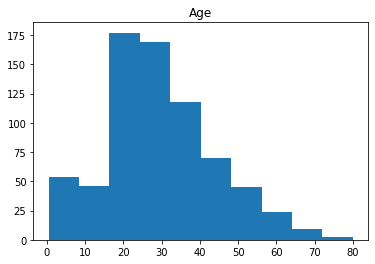

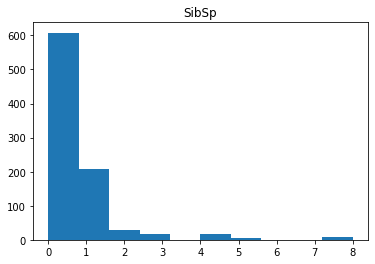

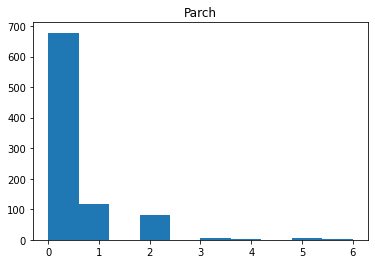

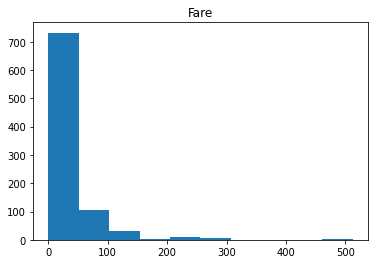

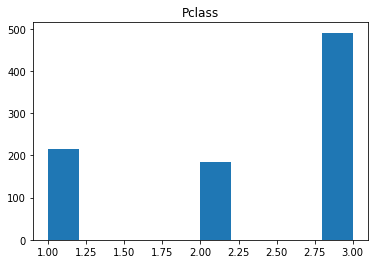

In [8]:
df_hist = titanic_train[['Age','SibSp','Parch','Fare','Pclass']]
for i in df_hist.columns:
    plt.hist(df_hist[i])
    plt.title(i)
    plt.show()


In [9]:
pd.pivot_table(titanic_train, index = 'Survived', values = df_hist)

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


In [10]:
titanic_train.groupby(['Sex', 'Pclass'])['Survived'].value_counts()

Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

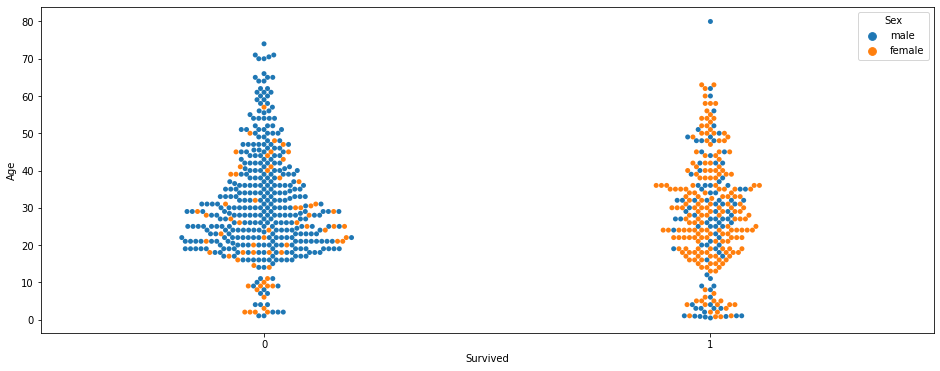

In [11]:
plt.figure(figsize=(16,6))
sns.swarmplot(x=titanic_train['Survived'], y=titanic_train['Age'], hue=titanic_train['Sex'])
#sns.scatterplot(x=titanic_train['Age'], y=titanic_train['Survived'], hue=titanic_train['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

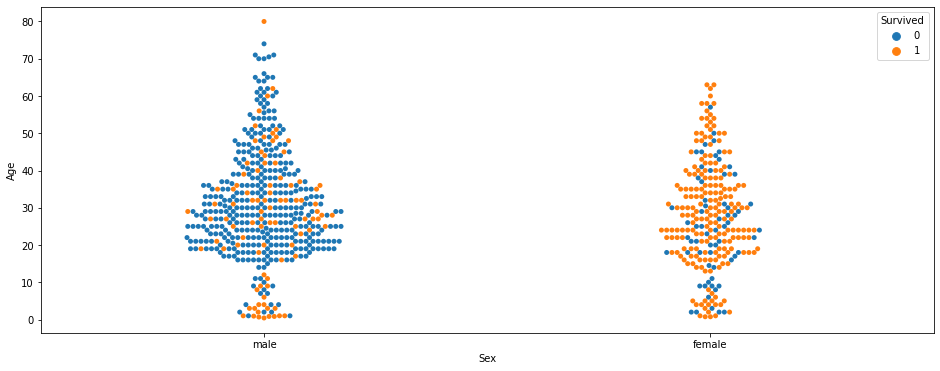

In [12]:
plt.figure(figsize=(16,6))
sns.swarmplot(x=titanic_train['Sex'], y=titanic_train['Age'], hue=titanic_train['Survived'])

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Fare'>

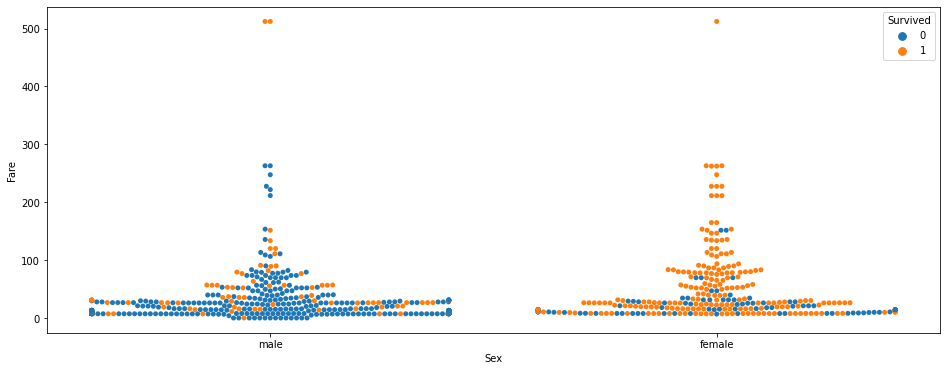

In [13]:
plt.figure(figsize=(16,6))
sns.swarmplot(x=titanic_train['Sex'], y=titanic_train['Fare'], hue=titanic_train['Survived'])

In [14]:
titanic_train.groupby(['Embarked'])['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

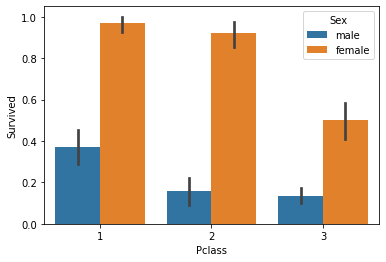

In [15]:
sns.barplot(x='Pclass', y='Survived', data=titanic_train,  hue=titanic_train['Sex'])

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

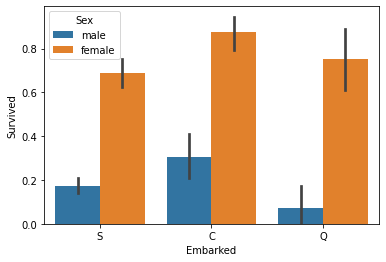

In [16]:
sns.barplot(x='Embarked', y='Survived', data=titanic_train, hue=titanic_train['Sex'])

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [18]:
features = ["Pclass", "Sex", "SibSp", "Parch","Age", "Embarked"]

titanic_train.Age = titanic_train.Age.fillna(titanic_train.Age.median())
titanic_test.Age = titanic_test.Age.fillna(titanic_test.Age.median())

X = pd.get_dummies(titanic_train[features])
X_test = pd.get_dummies(titanic_test[features])

In [19]:
y = titanic_train["Survived"]

In [20]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [21]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model.fit(train_X, train_y)
y_preds = model.predict(val_X)
print(mean_absolute_error(val_y, y_preds))

0.20179372197309417


In [22]:
predictions = model.predict(X_test)

In [23]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')
submission['Survived'] = predictions
submission.to_csv('VB_submission_titanic.csv', index=False)